Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory
$y = Ax$

we observe a $m$ linear projection of a $s$ sparse vector $x \in \mathbb{R}^d$ through a sensing matrix $A \in \mathbb{R}^{m,d}$

We want to rebuild $x$. This is an under-dermined problem. An equivalent problem to

$\min_{x \in \mathbb{R}^d} ||x||_0$ st $y = Az$ is

$\min_{x \in \mathbb{R}^d} ||Ax - y||_2$ st $||x||_0 \leq s$

# Algorithm

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import pylab as pyl

In [12]:
def omp(y, A, s=None, eps=None):
    n = A.shape[1]
    if not s and not eps:
        eps = 1e-3
        s = n
    elif not s:
        s = n
    else:
        eps = 0
    
    x = np.zeros(n)  # Initial x
    r = -y  # Residue
    err = [np.linalg.norm(r)]  # L2 error ||Ax-y||_2 = ||r||_2
    ind = set()  # Support of x
    while np.linalg.norm(x, ord=0) < s and err[-1] > eps:
        ind.add( np.argmax(np.abs(A.T.dot(r))) )
        x = minL2(y, A[:, list(ind)])
        r = A[:, list(ind)].dot(x) - y
        err.append( np.linalg.norm(r) )
    
    xsol = np.zeros(n)
    xsol[list(ind)] = x
    #return xsol, err
    return xsol

# Example

In [23]:
def minL2(y, A):
    p, n = A.shape
    if p < n:
        return A.T.dot( np.linalg.solve(A.dot(A.T), y) )
    else:
        return np.linalg.solve(A.T.dot(A), A.T.dot(y))

In [24]:
def mse(x_true, x_pred):
    return np.sqrt(((x_true - x_pred)**2).sum())

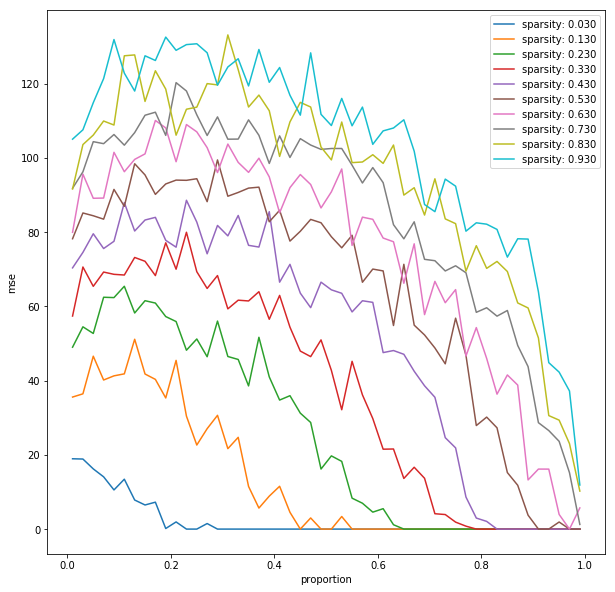

In [29]:
n = 100
fig, ax = plt.subplots(figsize=(10,10))

for parse in np.arange(3,n,10):
    props = np.linspace(0.01,0.99)
    mean_res = np.zeros(len(props))
    
    res = np.zeros(10)
    for _,prop in enumerate(props):
        for i in range(10):
                x = np.zeros(n)
                x[np.random.permutation(n)[:parse]] = np.random.randn(parse) * 10
                
                #sensing matrix size
                m = int(np.round(prop*n))
                
                # Sensing matrix random
                A = np.random.randn(m,n) * 10
                # observed y
                y = A.dot(x)
                res[i] = mse(omp(y,A), x)#sparse_signal_random_sensing_pseudo_invers(n,parse,prop)
        mean_res[_] = res.mean()
    ax.plot(props, mean_res,label="sparsity: %.3f" % (parse/n))
ax.set_xlabel("proportion")
ax.set_ylabel("mse")
ax.legend()